<a href="https://colab.research.google.com/github/nbche/AIFFEL_quest_cr/blob/main/18_DEC_2024_Module_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import sklearn
print(sklearn.__version__)

1.5.2


**프로젝트 (1) load-digits**

In [92]:
## Step 1. Scikitlearn 모듈 불러오기
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [93]:
## Step 2. 데이터 준비하기
digits = load_digits() # digits 데이터 전체 불러옴
print(dir(digits))  # 데이터 전체 구성요소 확인.

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [94]:
## Step 3. 데이터 이해하기
digits_data = digits.data  #digits 데이터의 data를 따로 data 변수에 저장
print(digits_data.shape)
digits_label = digits.target #digits 데이터의 target컬럼을 분류해 Label Data 지정
print(digits_label.shape)
print(digits.feature_names) #digits 데이터의 feature 이름을 확인하기
print(len(digits.feature_names))  # 64개의 변수가 맞는지 재확인
print(digits.target_names) #digits 데이터의 target 이름을 확인하기

print(digits.DESCR) ## 데이터셋 설명서 출력

(1797, 64)
(1797,)
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
64
[0 1 2 3 4 5 6 7 8 9]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------



In [95]:
## Step 4. train, test 데이터 분리
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(digits_data, digits_label, test_size = 0.2, random_state = 7) # train_test를 train_test_split으로 변경 # 변수 마지막의 d 는 digits data 임을 의미함.

In [96]:
## Step 5. 다양한 모델로 학습하기
## Step 5-1. 결정트리분류기 이용
from sklearn.tree import DecisionTreeClassifier # 결정트리분류기 모델 불러오기
decision_tree = DecisionTreeClassifier(random_state=7) #결정트리분류기 모델 객체 생성
decision_tree.fit(X_train_d, y_train_d) # 훈련하기

## Step 5-2. 랜덤포레스트분류기 이용
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 모델 불러오기
random_forest = RandomForestClassifier(random_state=7) # 랜덤포레스트 모델 객체 생성
random_forest.fit(X_train_d, y_train_d) # 훈련하기

## Step 5-3. Support Vector Machine (SVM) 이용
from sklearn import svm # SVM 모델 불러오기
svm_model = svm.SVC() # SVM 모델 객체 생성
svm_model.fit(X_train_d, y_train_d) # 훈련하기

## Step 5-4. Stochastic Gradient Descent (SGD) Classifier 이용
from sklearn.linear_model import SGDClassifier # SGD Classifier 모델 불러오기
sgd_model = SGDClassifier() # SGD Classifier 모델 객체 생성
sgd_model.fit(X_train_d, y_train_d) # 훈련하기

## Step 5-5. 로지스틱리그레션 이용
from sklearn.linear_model import LogisticRegression # 로지스틱리그레션 모델 불러오기
logistic_model = LogisticRegression() # 로지스틱리크레션 모델 객체 생성
logistic_model.fit(X_train_d, y_train_d) # 훈련하기

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
## Step 6. 모델 평가하기
from sklearn.metrics import classification_report # 분류 결과에 대한 시각화 리포트 불러오기
from sklearn.metrics import accuracy_score # accuracy_score 함수를 불러오기

## Step 6-1. 결정트리분류기
print('-'*10, "Decision Tree",'-'*10)
y_pred_d_dt = decision_tree.predict(X_test_d) # 결정트리분류기의 예측 결과
print(classification_report(y_test_d, y_pred_d_dt)) # 결정트리분류기 classification_report
accuracy_d_dt = accuracy_score(y_test_d, y_pred_d_dt) # 결정트리분류기 결과 정확도 측정
print(accuracy_d_dt)
print()

## Step 6-2. 랜덤포레스트분류기
print('-'*10, "Random Forest",'-'*10)
y_pred_d_rf = random_forest.predict(X_test_d) # 랜덤포레스트분류기 예측 결과
print(classification_report(y_test_d, y_pred_d_rf)) # 랜덤포레스트분류기 classification_report
accuracy_d_rf = accuracy_score(y_test_d, y_pred_d_rf) # 랜덤포레스트분류기 결과 정확도 측정
print(accuracy_d_rf)
print()
## Step 6-3. Support Vector Machine (SVM)
print('-'*10, "Support Vector Machine",'-'*10)
y_pred_d_svm = svm_model.predict(X_test_d) # SVM 모델 결과
print(classification_report(y_test_d, y_pred_d_svm)) # SVM classification_report
accuracy_d_svm = accuracy_score(y_test_d, y_pred_d_svm) # SVM 결과 정확도 측정
print(accuracy_d_svm)
print()
## Step 6-4. Stochastic Gradient Descent (SGD) Classifierprint('-'*50)
print('-'*10, "Stochastic Gradient Descent",'-'*10)
y_pred_d_sgd = sgd_model.predict(X_test_d) # SGD 예측 결과
print(classification_report(y_test_d, y_pred_d_sgd)) # SGD classification_report
accuracy_d_sgd = accuracy_score(y_test_d, y_pred_d_sgd) # SGD 결과 정확도 측정
print(accuracy_d_sgd)
print()
## Step 6-5. 로지스틱리그레션
print('-'*10, "Logistic Regression",'-'*10)
y_pred_d_logi = logistic_model.predict(X_test_d) # 로지스틱리그레션 예측 결과
print(classification_report(y_test_d, y_pred_d_logi)) # 로지스틱리그레션 classification_report
accuracy_d_logi = accuracy_score(y_test_d, y_pred_d_logi) # 로지스틱리그레션 결과 정확도 측정
print(accuracy_d_logi)
print()

---------- Decision Tree ----------
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.75      0.79      0.77        42
           2       0.77      0.82      0.80        40
           3       0.84      0.91      0.87        34
           4       0.83      0.92      0.87        37
           5       0.90      0.96      0.93        28
           6       0.90      0.93      0.91        28
           7       0.90      0.82      0.86        33
           8       0.90      0.63      0.74        43
           9       0.74      0.81      0.78        32

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360

0.8472222222222222

---------- Random Forest ----------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0

In [115]:
## Step 7. 평가 결과 분석하기
import pandas as pd

digit_df = pd.DataFrame(digits_data)
print(digit_df)                             ## DataFrame 형태로 자료 살펴보기
print('-'*30)
digit_df.describe()                         ## 자료의 통계적 의미 확인하기


       0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   62   63  
0     0.0  0.0  6.0  13.0

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


**프로젝트 (1) load-digits - 결과 분석**

1. 주어진 자료만을 가지고는 직관적으로 데이터의 속성이나 통계적 의미를 찾기가 어려움
2. 5개의 모델이 결과값 비교한 결과, 정확도와 정밀도 재현율 측면에서 SVM 모델이 최적으로 판단됨.

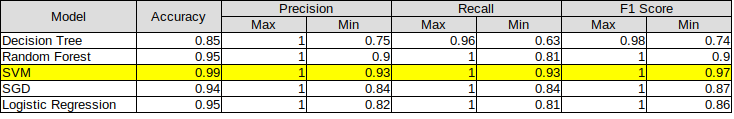



----------------------------------------------------------------------------------------------------------------------------------------------------------------

**프로젝트 (2) load-wine**




In [98]:
## Step 1. Scikitlearn 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [99]:
## Step 2. 데이터 준비하기
wine = load_wine() # wine 데이터 전체 불러옴
print(dir(wine))  # 데이터 구성요소 확인.

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [100]:
## Step 3. 데이터 이해하기
wine_data = wine.data  # wine 데이터의 data를 따로 data 변수에 저장
print(wine_data.shape)
wine_label = wine.target # wine 데이터의 target컬럼을 분류해 Label Data 지정
print(wine_label.shape)
print(wine.feature_names) # wine 데이터의 feature 이름을 확인하기
print(len(wine.feature_names))  # 13개의 변수가 맞는지 재확인
print(wine.target_names) # wine 데이터의 target 이름을 확인하기
print(wine.DESCR) ## 데이터셋 설명서 출력

(178, 13)
(178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
13
['class_0' 'class_1' 'class_2']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:    

In [101]:
## Step 4. train, test 데이터 분리
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(wine_data, wine_label, test_size = 0.2, random_state = 7) # train_test를 train_test_split으로 변경 # 변수 마지막의 w 는 wine data 임을 의미함.

In [102]:
## Step 5. 다양한 모델로 학습하기
## Step 5-1. 결정트리분류기 이용
from sklearn.tree import DecisionTreeClassifier # 결정트리분류기 모델 불러오기
decision_tree = DecisionTreeClassifier(random_state=7) #결정트리분류기 모델 객체 생성
decision_tree.fit(X_train_w, y_train_w) # 훈련하기

## Step 5-2. 랜덤포레스트분류기 이용
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 모델 불러오기
random_forest = RandomForestClassifier(random_state=7) # 랜덤포레스트 모델 객체 생성
random_forest.fit(X_train_w, y_train_w) # 훈련하기

## Step 5-3. Support Vector Machine (SVM) 이용
from sklearn import svm # SVM 모델 불러오기
svm_model = svm.SVC() # SVM 모델 객체 생성
svm_model.fit(X_train_w, y_train_w) # 훈련하기

## Step 5-4. Stochastic Gradient Descent (SGD) Classifier 이용
from sklearn.linear_model import SGDClassifier # SGD Classifier 모델 불러오기
sgd_model = SGDClassifier() # SGD Classifier 모델 객체 생성
sgd_model.fit(X_train_w, y_train_w) # 훈련하기

## Step 5-5. 로지스틱리그레션 이용
from sklearn.linear_model import LogisticRegression # 로지스틱리그레션 모델 불러오기
logistic_model = LogisticRegression() # 로지스틱리크레션 모델 객체 생성
logistic_model.fit(X_train_w, y_train_w) # 훈련하기

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
## Step 6. 모델 평가하기
from sklearn.metrics import classification_report # 분류 결과에 대한 시각화 리포트 불러오기
from sklearn.metrics import accuracy_score # accuracy_score 함수를 불러오기

## Step 6-1. 결정트리분류기
print('-'*10, "Decision Tree",'-'*10)
y_pred_w_dt = decision_tree.predict(X_test_w) # 결정트리분류기의 예측 결과
print(classification_report(y_test_w, y_pred_w_dt)) # 결정트리분류기 classification_report
accuracy_w_dt = accuracy_score(y_test_w, y_pred_w_dt) # 결정트리분류기 결과 정확도 측정
print(accuracy_w_dt)
print()
## Step 6-2. 랜덤포레스트분류기
print('-'*10, "Random Forest",'-'*10)
y_pred_w_rf = random_forest.predict(X_test_w) # 랜덤포레스트분류기 예측 결과
print(classification_report(y_test_w, y_pred_w_rf)) # 랜덤포레스트분류기 classification_report
accuracy_w_rf = accuracy_score(y_test_w, y_pred_w_rf) # 랜덤포레스트분류기 결과 정확도 측정
print(accuracy_w_rf)
print()
## Step 6-3. Support Vector Machine (SVM)
print('-'*10, "Support Vector Machine",'-'*10)
y_pred_w_svm = svm_model.predict(X_test_w) # SVM 모델 결과
print(classification_report(y_test_w, y_pred_w_svm)) # SVM classification_report
accuracy_w_svm = accuracy_score(y_test_w, y_pred_w_svm) # SVM 결과 정확도 측정
print(accuracy_w_svm)
print()
## Step 6-4. Stochastic Gradient Descent (SGD) Classifierprint('-'*50)
print('-'*10, "Stochastic Gradient Descent",'-'*10)
y_pred_w_sgd = sgd_model.predict(X_test_w) # SGD 예측 결과
print(classification_report(y_test_w, y_pred_w_sgd)) # SGD classification_report
accuracy_w_sgd = accuracy_score(y_test_w, y_pred_w_sgd) # SGD 결과 정확도 측정
print(accuracy_w_sgd)
print()
## Step 6-5. 로지스틱리그레션
print('-'*10, "Logistic Regression",'-'*10)
y_pred_w_logi = logistic_model.predict(X_test_w) # 로지스틱리그레션 예측 결과
print(classification_report(y_test_w, y_pred_w_logi)) # 로지스틱리그레션 classification_report
accuracy_w_logi = accuracy_score(y_test_w, y_pred_w_logi) # 로지스틱리그레션 결과 정확도 측정
print(accuracy_w_logi)
print()

---------- Decision Tree ----------
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      0.94      0.91        17
           2       1.00      0.83      0.91        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

0.9166666666666666

---------- Random Forest ----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

1.0

---------- Support Vector Machine ----------
              precision    recall  f1-score   support

           0       0.86      0.86      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [116]:
## Step 7. 평가 결과 분석하기

wine_df = pd.DataFrame(wine_data)
print(wine_df)                             ## DataFrame 형태로 자료 살펴보기
print('-'*30)
wine_df.describe()                         ## 자료의 통계적 의미 확인하기

        0     1     2     3      4     5     6     7     8      9     10  \
0    14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29   5.64  1.04   
1    13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28   4.38  1.05   
2    13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81   5.68  1.03   
3    14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18   7.80  0.86   
4    13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82   4.32  1.04   
..     ...   ...   ...   ...    ...   ...   ...   ...   ...    ...   ...   
173  13.71  5.65  2.45  20.5   95.0  1.68  0.61  0.52  1.06   7.70  0.64   
174  13.40  3.91  2.48  23.0  102.0  1.80  0.75  0.43  1.41   7.30  0.70   
175  13.27  4.28  2.26  20.0  120.0  1.59  0.69  0.43  1.35  10.20  0.59   
176  13.17  2.59  2.37  20.0  120.0  1.65  0.68  0.53  1.46   9.30  0.60   
177  14.13  4.10  2.74  24.5   96.0  2.05  0.76  0.56  1.35   9.20  0.61   

       11      12  
0    3.92  1065.0  
1    3.40  1050.0  
2    3.17  1185.0  
3    3.

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**프로젝트 (2) load-wine - 결과 분석**

1. digits 자료와 마찬가지로 wine 역시 주어진 자료만을 가지고는 직관적으로 데이터의 속성이나 통계적 의미를 찾기가 어려움
2. digits 의 경우 target 변수가 10개 였음에 반해 wine 은 3개임을 염두하고 아래와 같이 결과를 비교해 보도록 함
3. Random Forest 이 최적의 결과를 예측하고, 다음으로 Logistic Regression 은 정확도 등 여러 측면에서 우수함.

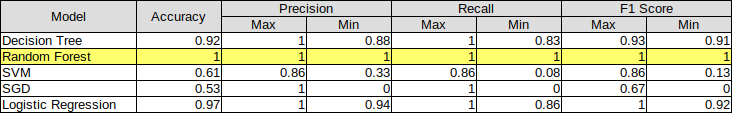

----------------------------------------------------------------------------------------------------------------------------------------------------------------

**프로젝트 (3) load-breast_cancer**

In [104]:
## Step 1. Scikitlearn 모듈 불러오기
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [105]:
## Step 2. 데이터 준비하기
bc = load_breast_cancer() # wine 데이터 전체 불러옴  # 데이터명은 breast cancer 의 약자인 bc 로 함
print(dir(bc))  # 데이터 구성요소 확인.

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [106]:
## Step 3. 데이터 이해하기
bc_data = bc.data  # breast cancer 데이터의 data를 따로 data 변수에 저장
print(bc_data.shape)
bc_label = bc.target # breast cancer 데이터의 target컬럼을 분류해 Label Data 지정
print(bc_label.shape)
print(bc.feature_names) # breast cancer 데이터의 feature 이름을 확인하기
print(len(bc.feature_names))  # 30개의 변수가 맞는지 재확인
print(bc.target_names) # breast cancer 데이터의 target 이름을 확인하기
print(len(bc.target_names))  # 2개의 변수가 맞는지 재확인
print(bc.DESCR) ## 데이터셋 설명서 출력

(569, 30)
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30
['malignant' 'benign']
2
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)

In [107]:
## Step 4. train, test 데이터 분리
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(bc_data, bc_label, test_size = 0.2, random_state = 7) # train_test를 train_test_split으로 변경 # 변수 마지막의 bc 는 bread cander (bc) data 임을 의미함.

In [108]:
## Step 5. 다양한 모델로 학습하기
## Step 5-1. 결정트리분류기 이용
from sklearn.tree import DecisionTreeClassifier # 결정트리분류기 모델 불러오기
decision_tree = DecisionTreeClassifier(random_state=7) #결정트리분류기 모델 객체 생성
decision_tree.fit(X_train_bc, y_train_bc) # 훈련하기

## Step 5-2. 랜덤포레스트분류기 이용
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 모델 불러오기
random_forest = RandomForestClassifier(random_state=7) # 랜덤포레스트 모델 객체 생성
random_forest.fit(X_train_bc, y_train_bc) # 훈련하기

## Step 5-3. Support Vector Machine (SVM) 이용
from sklearn import svm # SVM 모델 불러오기
svm_model = svm.SVC() # SVM 모델 객체 생성
svm_model.fit(X_train_bc, y_train_bc) # 훈련하기

## Step 5-4. Stochastic Gradient Descent (SGD) Classifier 이용
from sklearn.linear_model import SGDClassifier # SGD Classifier 모델 불러오기
sgd_model = SGDClassifier() # SGD Classifier 모델 객체 생성
sgd_model.fit(X_train_bc, y_train_bc) # 훈련하기

## Step 5-5. 로지스틱리그레션 이용
from sklearn.linear_model import LogisticRegression # 로지스틱리그레션 모델 불러오기
logistic_model = LogisticRegression() # 로지스틱리크레션 모델 객체 생성
logistic_model.fit(X_train_bc, y_train_bc) # 훈련하기

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
## Step 6. 모델 평가하기
from sklearn.metrics import classification_report # 분류 결과에 대한 시각화 리포트 불러오기
from sklearn.metrics import accuracy_score # accuracy_score 함수를 불러오기

## Step 6-1. 결정트리분류기
print('-'*10, "Decision Tree",'-'*10)
y_pred_bc_dt = decision_tree.predict(X_test_bc) # 결정트리분류기의 예측 결과
print(classification_report(y_test_bc, y_pred_bc_dt)) # 결정트리분류기 classification_report
accuracy_bc_dt = accuracy_score(y_test_bc, y_pred_bc_dt) # 결정트리분류기 결과 정확도 측정
print(accuracy_bc_dt)
print()
## Step 6-2. 랜덤포레스트분류기
print('-'*10, "Random Forest",'-'*10)
y_pred_bc_rf = random_forest.predict(X_test_bc) # 랜덤포레스트분류기 예측 결과
print(classification_report(y_test_bc, y_pred_bc_rf)) # 랜덤포레스트분류기 classification_report
accuracy_bc_rf = accuracy_score(y_test_bc, y_pred_bc_rf) # 랜덤포레스트분류기 결과 정확도 측정
print(accuracy_bc_rf)
print()
## Step 6-3. Support Vector Machine (SVM)
print('-'*10, "Support Vector Machine",'-'*10)
y_pred_bc_svm = svm_model.predict(X_test_bc) # SVM 모델 결과
print(classification_report(y_test_bc, y_pred_bc_svm)) # SVM classification_report
accuracy_bc_svm = accuracy_score(y_test_bc, y_pred_bc_svm) # SVM 결과 정확도 측정
print(accuracy_bc_svm)
print()
## Step 6-4. Stochastic Gradient Descent (SGD) Classifierprint('-'*50)
print('-'*10, "Stochastic Gradient Descent",'-'*10)
y_pred_bc_sgd = sgd_model.predict(X_test_bc) # SGD 예측 결과
print(classification_report(y_test_bc, y_pred_bc_sgd)) # SGD classification_report
accuracy_bc_sgd = accuracy_score(y_test_bc, y_pred_bc_sgd) # SGD 결과 정확도 측정
print(accuracy_bc_sgd)
print()
## Step 6-5. 로지스틱리그레션
print('-'*10, "Logistic Regression",'-'*10)
y_pred_bc_logi = logistic_model.predict(X_test_bc) # 로지스틱리그레션 예측 결과
print(classification_report(y_test_bc, y_pred_bc_logi)) # 로지스틱리그레션 classification_report
accuracy_bc_logi = accuracy_score(y_test_bc, y_pred_bc_logi) # 로지스틱리그레션 결과 정확도 측정
print(accuracy_bc_logi)
print()

---------- Decision Tree ----------
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

0.9122807017543859

---------- Random Forest ----------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.96      1.00      0.98        74

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

0.9736842105263158

---------- Support Vector Machine ----------
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy             

In [117]:
## Step 7. 평가 결과 분석하기

bc_df = pd.DataFrame(bc_data)
print(bc_df)                             ## DataFrame 형태로 자료 살펴보기
print('-'*30)
bc_df.describe()                         ## 자료의 통계적 의미 확인하기

        0      1       2       3        4        5        6        7       8   \
0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          9   ...      20  

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


프로젝트 (3) breast cancer - 결과 분석

- Breast cancer 의 경우 wine 보다 더 많은 총 30개의 Features 를 가지고 있다는 점에서 Pandas DataFrame 을 이용해 직관적으로 데이터의 속성이나 통계적 의미를 찾기가 어려움
- 또한 Breast cancer 의 경우, Target 이 2개인 이진분류로 구분된다는 점이 지금까지의 데이터와 가장 큰 차이점임
- 이진분류라는 속성 때문에 Logistic Regression 이 적합한 모델일꺼라는 실행 전 예상과 달리 Random Forest 가 더 강력한 예측력을 보여줌

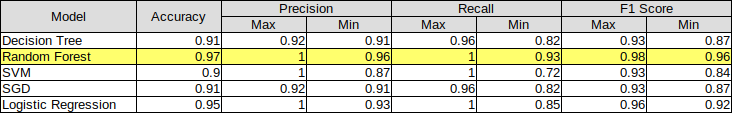